## Extracting Data

Easily extract tables from websites with pandas and python

source: https://www.singstat.gov.sg/

1. _**".\Tutorial 5 excel.xlsx"**_

Contains Aircraft ROT(seconds), Size(H,M) and exit used(1,2,3)

 

In [1]:
from pandas.io.html import read_html
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Extract tables XLSX
#Air Cargo in Tonne
rot_data=pd.read_excel(".\Tutorial 5 excel.xlsx",skiprows=0, na_values=['na'],index_col=0, usecols = "A:F")

rot_data.tail()

,entry time,exit time,exit no.,ROT,Type
Flight no,,,,,
46,64,124,2,60,H
47,69,126,2,57,H
48,69,135,2,66,H
49,77,129,1,52,H
50,81,138,1,57,M


### Subsetting Dataframe 

In [2]:
# List_df=[Airfreight_incoming,Airfreight_outgoing,Passenger_Departure,Passenger_Arrivals,Aircrafts_Arrival_Departure]
# list_df2=[0,0,0,0,0]
# list_name=["Airfreight_incoming","Airfreight_outgoing","Passenger_Departure","Passenger_Arrivals","Aircrafts_Arrival_Departure"]

# for idx, val in enumerate(List_df):
#     list_df2[idx]=val.iloc[:,val.columns>=start]
rot_data['Type']=='M'
rot_m_data=rot_data.loc[rot_data['Type']=='M',]
rot_h_data=rot_data.loc[rot_data['Type']=='H',]
rot_runway1_data=rot_data.loc[rot_data['exit no.']==1,]
rot_runway2_data=rot_data.loc[rot_data['exit no.']==2,]
rot_runway3_data=rot_data.loc[rot_data['exit no.']==3,]

#### Statistical Summary of M and H aircraft Runway Occupancy Time
An alternative to R ".summary": "<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html" target="_blank">pd.df.describe()</a>"

In [3]:
rot_m_data.describe()

,entry time,exit time,exit no.,ROT
count,25.000000,25.000000,25.000000,25.000000
mean,75.640000,125.640000,1.120000,50.000000
std,7.342116,10.164809,0.331662,4.983305
min,59.000000,102.000000,1.000000,43.000000
25%,72.000000,118.000000,1.000000,46.000000
50%,75.000000,125.000000,1.000000,49.000000
75%,79.000000,133.000000,1.000000,55.000000
max,94.000000,148.000000,2.000000,57.000000


In [4]:
rot_h_data.describe()

,entry time,exit time,exit no.,ROT
count,25.000000,25.000000,25.000000,25.000000
mean,67.760000,125.600000,1.720000,57.840000
std,6.036555,7.989577,0.791623,7.898734
min,56.000000,108.000000,1.000000,42.000000
25%,64.000000,122.000000,1.000000,52.000000
50%,67.000000,127.000000,2.000000,58.000000
75%,70.000000,130.000000,2.000000,63.000000
max,81.000000,137.000000,3.000000,73.000000


#### .groupby() function to count frequency for each unique value of ROT
Just exploring the data

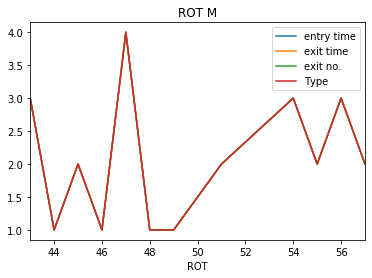

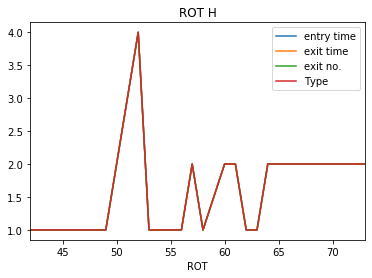

In [5]:
rot_m_data.groupby('ROT').count().plot(title='ROT M')

rot_h_data.groupby('ROT').count().plot(title='ROT H')

## Plotting Histogram For Each Aircraft Type

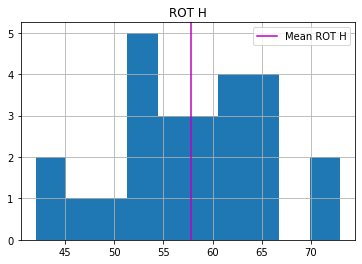

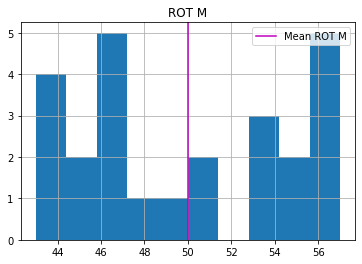

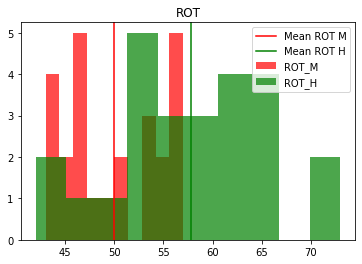

In [6]:
#rot_data['ROT'].hist(bins=10)
#plt.title('ROT ALL')

#Histogram Heavy
rot_h_data[['ROT']].hist(bins=10)
plt.title('ROT H')
plt.axvline(x=rot_h_data['ROT'].values.mean(),c='m',label='Mean ROT H')
plt.legend()

#Histogram Medium
rot_m_data[['ROT']].hist(bins=10)
plt.title('ROT M')
plt.axvline(x=rot_m_data['ROT'].values.mean(),c='m',label='Mean ROT M')
plt.legend()

#Histogram Combined
rot_m_data[['ROT']].hist(bins=10,alpha=0.7,color='r',label='ROT_M')
plt.hist(rot_h_data['ROT'].values,bins=10,alpha=0.7,color='g',label='ROT_H')
plt.grid()
plt.axvline(x=rot_m_data['ROT'].values.mean(),c='r',label='Mean ROT M')
plt.axvline(x=rot_h_data['ROT'].values.mean(),c='g',label='Mean ROT H')
plt.legend()
#plt.plot(x, rv.pdf(x), lw=2)

## Plotting Histogram For Each Runway Exit

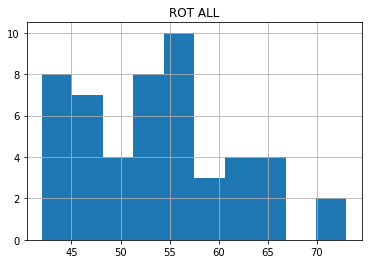

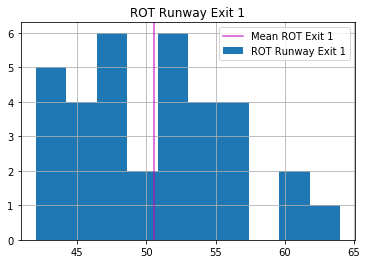

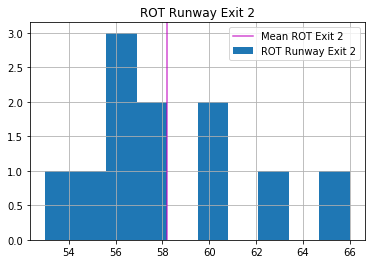

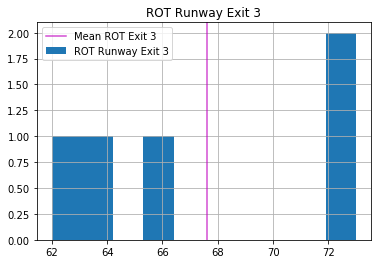

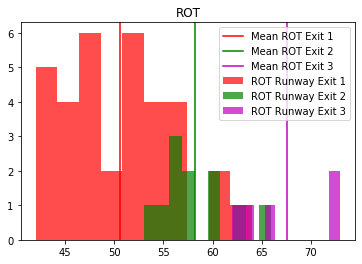

In [7]:
rot_data['ROT'].hist(bins=10)
plt.title('ROT ALL')
# plt.title('ROT M')
# plt.title('ROT H')

#Histogram Exit 1
rot_runway1_data[['ROT']].hist(bins=10,label='ROT Runway Exit 1')
plt.title('ROT Runway Exit 1')
plt.axvline(x=rot_runway1_data['ROT'].values.mean(),alpha=0.7,c='m',label='Mean ROT Exit 1')
plt.legend()

#Histogram Exit 2
rot_runway2_data[['ROT']].hist(bins=10,label='ROT Runway Exit 2')
plt.title('ROT Runway Exit 2')
plt.axvline(x=rot_runway2_data['ROT'].values.mean(),alpha=0.7,c='m',label='Mean ROT Exit 2')
plt.legend()

#Histogram Exit 3
rot_runway3_data[['ROT']].hist(bins=10,label='ROT Runway Exit 3')
plt.title('ROT Runway Exit 3')
plt.axvline(x=rot_runway3_data['ROT'].values.mean(),alpha=0.7,c='m',label='Mean ROT Exit 3')
plt.legend()

#Histogram Exit 1,2,3
rot_runway1_data[['ROT']].hist(bins=10,alpha=0.7,color='r',label='ROT Runway Exit 1')
plt.hist(rot_runway2_data['ROT'].values,bins=10,alpha=0.7,color='g',label='ROT Runway Exit 2')
plt.hist(rot_runway3_data['ROT'].values,bins=10,alpha=0.7,color='m',label='ROT Runway Exit 3')
plt.grid()
plt.axvline(x=rot_runway1_data['ROT'].values.mean(),c='r',label='Mean ROT Exit 1')
plt.axvline(x=rot_runway2_data['ROT'].values.mean(),c='g',label='Mean ROT Exit 2')
plt.axvline(x=rot_runway3_data['ROT'].values.mean(),c='m',label='Mean ROT Exit 3')
plt.legend()

50.529411764705884 58.18181818181818 67.6


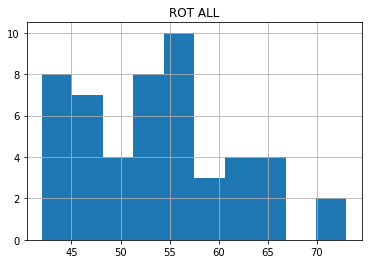

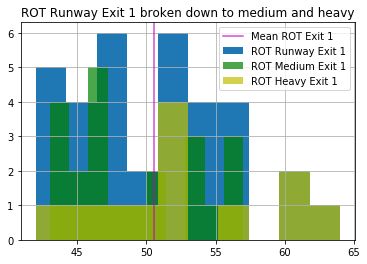

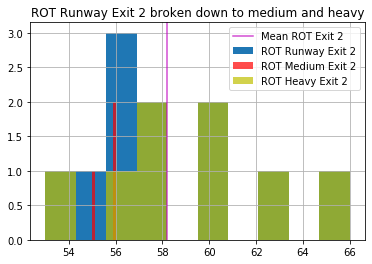

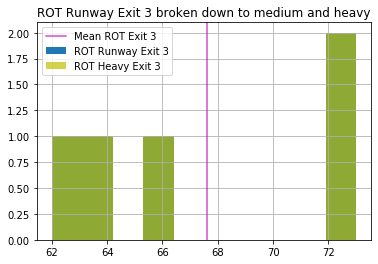

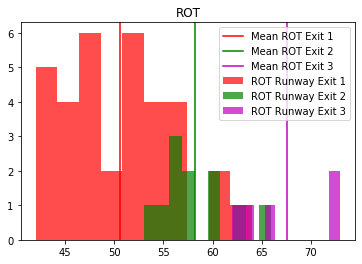

In [16]:
rot_data['ROT'].hist(bins=10)
plt.title('ROT ALL')
# plt.title('ROT M')
# plt.title('ROT H')

#Histogram Exit 1
rot_runway1_data[['ROT']].hist(bins=10,label='ROT Runway Exit 1')
plt.hist(rot_runway1_data.loc[rot_runway1_data['Type']=='M',]['ROT'].values,bins=10,alpha=0.7,color='g',label='ROT Medium Exit 1')
plt.hist(rot_runway1_data.loc[rot_runway1_data['Type']=='H',]['ROT'].values,bins=10,alpha=0.7,color='y',label='ROT Heavy Exit 1')

plt.title('ROT Runway Exit 1 broken down to medium and heavy')
plt.axvline(x=rot_runway1_data['ROT'].values.mean(),alpha=0.7,c='m',label='Mean ROT Exit 1')
plt.legend()

#Histogram Exit 2
rot_runway2_data[['ROT']].hist(bins=10,label='ROT Runway Exit 2')
plt.hist(rot_runway2_data.loc[rot_runway2_data['Type']=='M',]['ROT'].values,bins=10,alpha=0.7,color='r',label='ROT Medium Exit 2')
plt.hist(rot_runway2_data.loc[rot_runway2_data['Type']=='H',]['ROT'].values,bins=10,alpha=0.7,color='y',label='ROT Heavy Exit 2')

plt.title('ROT Runway Exit 2 broken down to medium and heavy')
plt.axvline(x=rot_runway2_data['ROT'].values.mean(),alpha=0.7,c='m',label='Mean ROT Exit 2')
plt.legend()

#Histogram Exit 3
rot_runway3_data[['ROT']].hist(bins=10,label='ROT Runway Exit 3')
#plt.hist(rot_runway3_data.loc[rot_runway3_data['Type']=='M',]['ROT'].values,bins=10,alpha=0.7,color='g',label='ROT Medium Exit 3')
plt.hist(rot_runway3_data.loc[rot_runway3_data['Type']=='H',]['ROT'].values,bins=10,alpha=0.7,color='y',label='ROT Heavy Exit 3')

plt.title('ROT Runway Exit 3 broken down to medium and heavy')
plt.axvline(x=rot_runway3_data['ROT'].values.mean(),alpha=0.7,c='m',label='Mean ROT Exit 3')
plt.legend()

#Histogram Exit 1,2,3
rot_runway1_data[['ROT']].hist(bins=10,alpha=0.7,color='r',label='ROT Runway Exit 1')
plt.hist(rot_runway2_data['ROT'].values,bins=10,alpha=0.7,color='g',label='ROT Runway Exit 2')
plt.hist(rot_runway3_data['ROT'].values,bins=10,alpha=0.7,color='m',label='ROT Runway Exit 3')
plt.grid()
plt.axvline(x=rot_runway1_data['ROT'].values.mean(),c='r',label='Mean ROT Exit 1')
plt.axvline(x=rot_runway2_data['ROT'].values.mean(),c='g',label='Mean ROT Exit 2')
plt.axvline(x=rot_runway3_data['ROT'].values.mean(),c='m',label='Mean ROT Exit 3')
plt.legend()

print(rot_runway1_data['ROT'].values.mean(),rot_runway2_data['ROT'].values.mean(),rot_runway3_data['ROT'].values.mean())